In [ ]:
#@title Configuration parameters
#@markdown Forms support many types of fields.

dataset_url = 'http://extrasensory.ucsd.edu/data/primary_data_files/ExtraSensory.per_uuid_features_labels.zip'  #@param {type: "string"}


# starter code

Using sensors to predict activity. This part of the assignment uses the [ExtraSensory dataset](http://extrasensory.ucsd.edu/). You can download the dataset from [here](http://extrasensory.ucsd.edu/data/primary_data_files/ExtraSensory.per_uuid_features_labels.zip). The starter code expects that this dataset has been unpacked in a folder called `data` that is in the same parent folder as this notebook. You can read more about the dataset in [this README file](http://extrasensory.ucsd.edu/data/primary_data_files/README.txt).

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

## Location of the .csv.gz files

In [ ]:
data_dir = Path('data')

!mkdir -p $data_dir
!curl $dataset_url > $data_dir/dataset.zip
!unzip -o $data_dir/dataset.zip -d $data_dir/
!rm $data_dir/dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  214M  100  214M    0     0  36.2M      0  0:00:05  0:00:05 --:--:-- 41.3M
Archive:  data/dataset.zip
  inflating: data/00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv.gz  
  inflating: data/098A72A5-E3E5-4F54-A152-BBDA0DF7B694.features_labels.csv.gz  
  inflating: data/0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv.gz  
  inflating: data/0BFC35E2-4817-4865-BFA7-764742302A2D.features_labels.csv.gz  
  inflating: data/0E6184E1-90C0-48EE-B25A-F1ECB7B9714E.features_labels.csv.gz  
  inflating: data/1155FF54-63D3-4AB2-9863-8385D0BD0A13.features_labels.csv.gz  
  inflating: data/11B5EC4D-4133-4289-B475-4E737182A406.features_labels.csv.gz  
  inflating: data/136562B6-95B2-483D-88DC-065F28409FD2.features_labels.csv.gz  
  inflating: data/1538C99F-BA1E-4EFB-A949-6C7C47701B20.features_labels.csv.gz  
  inflating: dat

## Some utility functions

The first one loads a pandas dataframe given a user UUID. The second one extracts specified feature columns $X$ and target column $y$ from a dataframe and converts these to numpy.

In [ ]:
def load_data_for_user(uuid):
    return pd.read_csv(data_dir / (uuid + '.features_labels.csv.gz'))

def get_features_and_target(df, feature_names, target_name):
    
    # select out features and target columns and convert to numpy
    X = df[feature_names].to_numpy()
    y = df[target_name].to_numpy()
    
    # remove examples with no label
    has_label = ~np.isnan(y)
    X = X[has_label,:]
    y = y[has_label]
    return X, y

def get_dataset_for_user(uuid):
  
  df = load_data_for_user(uuid)
  X, y = get_features_and_target(df, acc_sensors, target_column)

  return X, y

def print_classifier_accuracy(clf, X_test, y_test, label=''):
  score = clf.score(X_test, y_test)
  print(f'Score for classifier {label}: {score:0.4f}')
  
  y_pred = clf.predict(X_test)
  accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
  print(f'Balanced accuracy for classifier {label}: {accuracy:0.4f}')

  precision = metrics.precision_score(y_test, y_pred)
  print(f'Precision score for classifier {label}: {precision:0.4f}')
  
  recall = metrics.recall_score(y_test, y_pred)
  print(f'Recall score for classifier {label}: {recall:0.4f}')

  f1 = metrics.f1_score(y_test, y_pred)
  print(f'F1-score for classifier {label}: {f1:0.4f}')

  roc_auc = metrics.roc_auc_score(y_test, y_pred)
  print(f'ROC-AUC score for classifier {label}: {f1:0.4f}')


## Load in some data 
Load in the data for a user and display the first few rows of the dataframe

In [ ]:
initial_uuid = '1155FF54-63D3-4AB2-9863-8385D0BD0A13'
df = load_data_for_user(initial_uuid)
df.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1464129912,1.011438,0.012573,0.023013,0.041240,1.006184,1.010868,1.016028,0.935099,6.684536,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
1,1464129950,1.011233,0.009356,-0.005622,0.016687,1.006338,1.010926,1.016657,1.732968,6.684569,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
2,1464130031,1.013422,0.018068,-0.008593,0.039286,1.004077,1.012983,1.021926,1.464639,6.684453,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
3,1464130109,1.014891,0.016400,0.021383,0.038825,1.005934,1.014670,1.023000,1.440043,6.684483,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
4,1464130130,1.017487,0.022632,-0.012891,0.037226,1.006040,1.017587,1.028168,1.937362,6.684364,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2


## What columns are available?

In [ ]:
df.columns.to_list()

['timestamp',
 'raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'proc_gyro:magnitude_stats:mean',
 'proc_gyro:magnitude_stats:std

## Feature selection

The columns that start with `label:` correspond to potential y values. Let's look at using the accelerometer features. These start with `raw_acc:` and `watch_acceleration:`

In [ ]:
acc_sensors = [s for s in df.columns if 
               s.startswith('raw_acc:') or 
               s.startswith('watch_acceleration:')]

target_column = 'label:FIX_walking'

## Extract our training data

In [ ]:
X_train, y_train = get_features_and_target(df, acc_sensors, target_column)
print(f'{y_train.shape[0]} examples with {y_train.sum()} positives')

2681 examples with 158.0 positives


## Preprocessing

We want to make the learning problem easier by making all columns have a mean of zero and a standard deviation of one. There are also lots of missing values in this dataset. We'll use mean imputation here to get rid of them. Since our data is scaled to have zero mean, this will just zero out missing values.

In [ ]:
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')

X_train = scaler.fit_transform(X_train)
X_train = imputer.fit_transform(X_train)

## Fitting a model
Let's fit a logistic regression model to this user. We can then test it's predictive power on a different user

In [ ]:
clf = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Training accuracy

Let's see the accuracy on the training set. The score function can be used to do this:

In [ ]:
print(f'Training accuracy: {clf.score(X_train, y_train):0.4f}')

Training accuracy: 0.9750


Looks like the model can fit the training data reasonably well anyway. But this says nothing about how well it will generalize to new data. The dataset is also unbalanced, so this figure may be misleading. How accurate would we be if we just predicted zero each time?

In [ ]:
1 - y_train.sum() / y_train.shape[0]

0.9410667661320403

Oh wow. Our model may not be that great after all. Let's try to calculate balanced accuracy, which should better reflect how well the model does on the training data

In [ ]:
y_pred = clf.predict(X_train)
print(f'Balanced accuracy (train): {metrics.balanced_accuracy_score(y_train, y_pred):0.4f}')

Balanced accuracy (train): 0.8354


## Testing the model

Ok, it seems our model has fit the training data well. How well does it perform on unseen test data? Let's load the data in for a different user.

In [ ]:
X_test, y_test = get_dataset_for_user('11B5EC4D-4133-4289-B475-4E737182A406')

We also need to preprocess as before. **Note**: we are using the scaler and imputer fit to the training data here. It's very important that you do not call `fit` or `fit_transform` here! Think about why.

In [ ]:
X_test = imputer.transform(scaler.transform(X_test))

## Test accuracy

In [ ]:
print(f'Test accuracy: {clf.score(X_test, y_test):0.4f}')

Test accuracy: 0.9746


In [ ]:
y_pred = clf.predict(X_test)
print(f'Balanced accuracy (train): {metrics.balanced_accuracy_score(y_test, y_pred):0.4f}')

Balanced accuracy (train): 0.7327


## Improving the test set

Let's take 5 random users

In [ ]:
uuids = [
    '00EABED2-271D-49D8-B599-1D4A09240601', '098A72A5-E3E5-4F54-A152-BBDA0DF7B694', '0A986513-7828-4D53-AA1F-E02D6DF9561B',
    '0BFC35E2-4817-4865-BFA7-764742302A2D', '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E'
]

test_scores = []
balanced_accuracies = []
for uuid in uuids:
  X_test, y_test = get_dataset_for_user(uuid)

  X_test = imputer.transform(scaler.transform(X_test))
  score = clf.score(X_test, y_test)
  test_scores.append(score)
  print(f'Test accuracy for {uuid}: {score:0.4f}')
  y_pred = clf.predict(X_test)
  accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
  balanced_accuracies.append(accuracy)
  print(f'Balanced accuracy for {uuid} (train): {accuracy:0.4f}')

print()
print(f'Mean of the test accuracies for the five users: {np.mean(test_scores)}')
print(f'Variance of the test accuracies for the five users: {np.var(test_scores)}')
print()
print(f'Mean of the test balanced accuracies for the five users: {np.mean(balanced_accuracies)}')
print(f'Variance of the test balanced accuracies for the five users: {np.var(balanced_accuracies)}')


Test accuracy for 00EABED2-271D-49D8-B599-1D4A09240601: 0.9320
Balanced accuracy for 00EABED2-271D-49D8-B599-1D4A09240601 (train): 0.6230
Test accuracy for 098A72A5-E3E5-4F54-A152-BBDA0DF7B694: 0.9623
Balanced accuracy for 098A72A5-E3E5-4F54-A152-BBDA0DF7B694 (train): 0.6865
Test accuracy for 0A986513-7828-4D53-AA1F-E02D6DF9561B: 0.9497
Balanced accuracy for 0A986513-7828-4D53-AA1F-E02D6DF9561B (train): 0.6765
Test accuracy for 0BFC35E2-4817-4865-BFA7-764742302A2D: 0.7961
Balanced accuracy for 0BFC35E2-4817-4865-BFA7-764742302A2D (train): 0.4889
Test accuracy for 0E6184E1-90C0-48EE-B25A-F1ECB7B9714E: 0.8157
Balanced accuracy for 0E6184E1-90C0-48EE-B25A-F1ECB7B9714E (train): 0.5791

Mean of the test accuracies for the five users: 0.8911686990826506
Variance of the test accuracies for the five users: 0.00498134275682751

Mean of the test balanced accuracies for the five users: 0.610785917475387
Variance of the test balanced accuracies for the five users: 0.00521394286395418


Let's create a test dataset containing all 5 users

In [ ]:
def get_testing_dataset():
  X_test_five_users, y_test_five_users = get_dataset_for_user(uuids[0])

  for uuid in uuids[1:]:
      X_test, y_test = get_dataset_for_user(uuid)

      X_test_five_users = np.concatenate((X_test, X_test_five_users), axis=0)
      y_test_five_users = np.concatenate((y_test, y_test_five_users), axis=0)

  X_test_five_users = imputer.transform(scaler.transform(X_test_five_users))

  return X_test_five_users, y_test_five_users

X_test_five_usrs, y_test_five_users = get_testing_dataset()

Let's test the accuracy of the model with this data

In [ ]:
score = clf.score(X_test_five_users, y_test_five_users)
print(f'Test accuracy for all five users: {score:0.4f}')
y_pred_five_users = clf.predict(X_test_five_users)
accuracy = metrics.balanced_accuracy_score(y_test_five_users, y_pred_five_users)
print(f'Balanced accuracy for all five users (train): {accuracy:0.4f}')


Test accuracy for all five users: 0.8879
Balanced accuracy for all five users (train): 0.5850


## Validation data

We can reuse the dataset of the five users as a validation dataset

In [ ]:
X_validation = X_test_five_users
y_validation = y_test_five_users

## Increased training data

Let's check how the accuracy of the classifier changes when using another user to train the classifier

In [ ]:
new_uuid = '9759096F-1119-4E19-A0AD-6F16989C7E1C'
X_new, y_new = get_dataset_for_user(new_uuid)

clf_new = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0)

X_new = imputer.transform(scaler.transform(X_new))
clf_new.fit(X_new, y_new)

LogisticRegression(max_iter=1000, solver='liblinear')

Calculate score on the new classifier using test data

In [ ]:
score = clf_new.score(X_test_five_users, y_test_five_users)
print(f'Test accuracy for all five users: {score:0.4f}')
y_pred_five_users = clf_new.predict(X_test_five_users)
accuracy = metrics.balanced_accuracy_score(y_test_five_users, y_pred_five_users)
print(f'Balanced accuracy for all five users (train): {accuracy:0.4f}')

Test accuracy for all five users: 0.8915
Balanced accuracy for all five users (train): 0.5620


With this user we get slightly better results. Let's combine the training dataset to have multiple users

In [ ]:
def get_training_dataset():
  uuids_train = ['9759096F-1119-4E19-A0AD-6F16989C7E1C', '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'CDA3BBF7-6631-45E8-85BA-EEB416B32A3C',
                'C48CE857-A0DD-4DDB-BEA5-3A25449B2153', 'FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF']

  X_train, y_train = get_dataset_for_user(uuids_train[0])

  for uuid in uuids_train[1:]:
      X_uuid, y_uuid = get_dataset_for_user(uuid)

      X_train = np.concatenate((X_uuid, X_train), axis=0)
      y_train = np.concatenate((y_uuid, y_train), axis=0)



  X_train = imputer.transform(scaler.transform(X_train))
  return X_train, y_train

X_train, y_train = get_training_dataset()

clf_new = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0)

clf_new.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

We can note that the new classifier has better accuracy than the old one.

In [ ]:
print_classifier_accuracy(clf, X_test_five_users, y_test_five_users, label='single-user')
print_classifier_accuracy(clf_new, X_test_five_users, y_test_five_users, label='multiple-users')

Test accuracy for classifier single-user: 0.8879
Balanced accuracy for classifier single-user: 0.5850
Test accuracy for classifier multiple-users: 0.8975
Balanced accuracy for classifier multiple-users: 0.5935


## Model Selection

To start, let's define a set of C's to train our model

In [ ]:
def get_clf(C):
    return LogisticRegression(solver='liblinear', max_iter=10000, C=C)

Cs = np.linspace(0.00001, 10, 20)

scores = []
balanced_accuracies = []

for C in Cs:
  clf = get_clf(C)
  clf.fit(X_train, y_train)

  score = clf.score(X_train, y_train)
  scores.append(score)
  y_pred = clf.predict(X_train)
  accuracy = metrics.balanced_accuracy_score(y_train, y_pred)
  balanced_accuracies.append(accuracy)


Text(0.5, 1.0, 'Trainscores vs C')

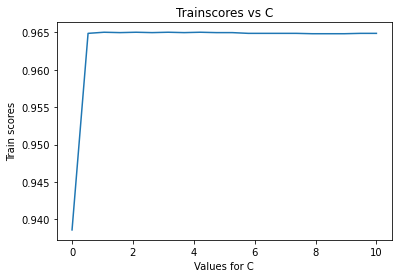

In [ ]:
plt.plot(Cs, scores)

plt.xlabel('Values for C')
plt.ylabel('Train scores')
plt.title('Trainscores vs C')

Text(0.5, 1.0, 'Balanced accuracies vs C')

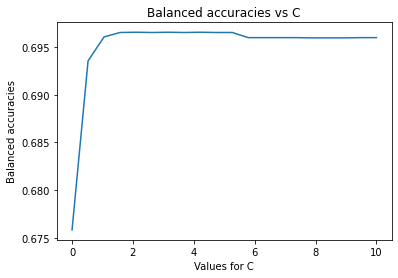

In [ ]:
plt.plot(Cs, balanced_accuracies)

plt.xlabel('Values for C')
plt.ylabel('Balanced accuracies')
plt.title('Balanced accuracies vs C')

As we can note on the test score, there is a value for C such that incresing it will have no effect on the result (a.k.a performance doesn't change). On the other hand, best value for balanced accuracy is by using the smallest C possible.

In [ ]:
best_score_idx = np.argmax(scores)
best_accuracy_score_idx = np.argmax(balanced_accuracies)

print(f'Best C for score metric: {Cs[best_score_idx]}')
print(f'Best C for balanced accuracy metric: {Cs[best_accuracy_score_idx]}')
print(f'Best score metric: {scores[best_score_idx]}')
print(f'Best balanced accuracy metric: {balanced_accuracies[best_accuracy_score_idx]}')

Best C for score metric: 1.0526405263157896
Best C for balanced accuracy metric: 2.105271052631579
Best score metric: 0.9650287299385774
Best balanced accuracy metric: 0.6965432460801918


Let's try with the MLP classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)

mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=2000, random_state=1)

In [ ]:
print_classifier_accuracy(mlp_clf, X_train, y_train)

Test accuracy for classifier : 0.9733
Balanced accuracy for classifier : 0.7798


Let's also try with something arguably less complex such as SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [ ]:
print_classifier_accuracy(svc, X_train, y_train)

Test accuracy for classifier : 0.9724
Balanced accuracy for classifier : 0.7282


Amongst these three, the one with best performance is MLP

## Model Testing

Let's see how our MLP model behave on the test dataset

In [ ]:
print_classifier_accuracy(mlp_clf, X_validation, y_validation)

Score for classifier : 0.8893
Balanced accuracy for classifier : 0.5774
Precision score for classifier : 0.5730
Recall score for classifier : 0.1716
F1-score for classifier : 0.2642
ROC-AUC score for classifier : 0.2642


Let's plot an ROC curve

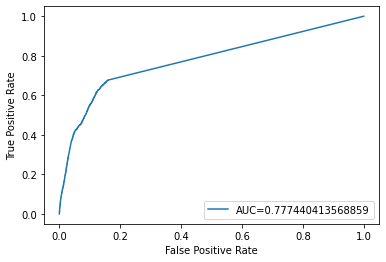

In [ ]:
y_pred_proba = mlp_clf.predict_proba(X_validation)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_validation,  y_pred_proba)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


We can see that the curve is more leaned towards the top-left corner of the plot. That is a good indicator that the classifier is doing a good job. Also, the AUC is 0.7774, a value that confirms it.

## Predicting other actions

By changing `target_column` we can easily get the new model for the new target column

In [ ]:
new_targets = ['label:SITTING', 'label:BICYCLING']

for t in new_targets:
  print(f'Training for column: {t}')
  target_column = t
  X_train, y_train = get_training_dataset()

  mlp = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)
  mlp.fit(X_train, y_train)

  X_test, y_test = get_testing_dataset()

  print_classifier_accuracy(mlp, X_test, y_test, label='MLP')
  print()

Training for column: label:SITTING
Score for classifier MLP: 0.6299
Balanced accuracy for classifier MLP: 0.6313
Precision score for classifier MLP: 0.5993
Recall score for classifier MLP: 0.6568
F1-score for classifier MLP: 0.6267
ROC-AUC score for classifier MLP: 0.6267

Training for column: label:BICYCLING
Score for classifier MLP: 0.9737
Balanced accuracy for classifier MLP: 0.6583
Precision score for classifier MLP: 0.6033
Recall score for classifier MLP: 0.3230
F1-score for classifier MLP: 0.4207
ROC-AUC score for classifier MLP: 0.4207

